In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Define the paths to your image and csv folders
train_val= "./train_val"
test = "./test"
train_path_csv = "./train_val.csv"
train_val_labels = pd.read_csv(train_path_csv)

In [5]:
# load training dataset in numpy array
images = []
labels = []
for filename in os.listdir(train_val):
    if filename.endswith('.png'):
        # Load the images and resize them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(train_val, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # img = Image.open(os.path.join(train_val, filename))
        img_array = np.array(img)
        # Append the array to the list of images
        images.append(img_array)
        labels.append(filename)
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

In [6]:
x_train.shape

(1000, 128, 128, 3)

In [7]:
x_train[:5]
y_train[:5]

array([512, 690, 190, 701, 434])

In [8]:
# load test dataset in numpy array
images = []
labels = []
for filename in os.listdir(test):
    if filename.endswith('.png'):
        # Load the images and resize them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(test, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # img = Image.open(os.path.join(test, filename))
        img_array = np.array(img)
        # Append the array to the list of images
        images.append(img_array)
        labels.append(filename)
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_test.npy', images)
np.save('y_test.npy', labels)
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [9]:
x_test.shape

(50, 128, 128, 3)

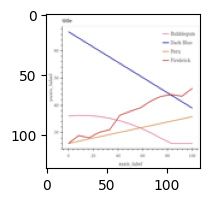

In [10]:
# check the images loaded
plt.figure(figsize = (10,2))
plt.imshow(x_train[10])
plt.imshow(x_train[208])
plt.imshow(x_train[444])

In [11]:
# define some classes from the images we have observed
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
image_classes[0]
# map the categories to the labels array i.e y_train
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])
y_train
y_train.shape
y_test.shape

(50,)

In [13]:
# we need to map the lables from csv to the images somehow
# function to test the chart sample
def image_sample(x, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(x[index])
    # image_label = train_val_labels.iloc[index]['type']
    # plt.xlabel(image_label)
    plt.xlabel(image_classes[y[index]])

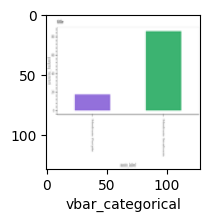

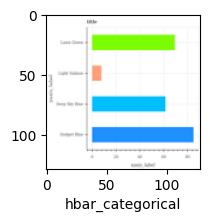

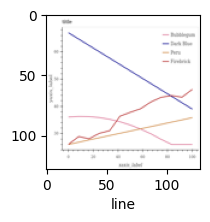

In [14]:
image_sample(x_train,y_train,0)
image_sample(x_train,y_train,208)
image_sample(x_train,y_train,444)

In [15]:
# now we have mapped the corresponding labels to the image

In [16]:
# normalize the image
# x_train[0]/255
x_train=x_train /255
x_test=x_train /255

In [17]:
x_test.shape

(1000, 128, 128, 3)

In [18]:
# take the label for train data from csv file
y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']

In [19]:
y_train_type[:5]

0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [20]:
# writing a simple nn to test first
# Define the model architecture
model = Sequential([
    Flatten(input_shape=(128,128,3)),
    Dense(3000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(5, activation='softmax')
    ])
# Compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
32/32 [==============================] - 41s 1s/step - loss: 6.4779 - accuracy: 0.1920
Epoch 2/10
32/32 [==============================] - 43s 1s/step - loss: 1.6182 - accuracy: 0.2300
Epoch 3/10
32/32 [==============================] - 42s 1s/step - loss: 1.6118 - accuracy: 0.2300
Epoch 4/10
32/32 [==============================] - 37s 1s/step - loss: 1.5789 - accuracy: 0.2760
Epoch 5/10
32/32 [==============================] - 39s 1s/step - loss: 1.5841 - accuracy: 0.2670
Epoch 6/10
32/32 [==============================] - 39s 1s/step - loss: 1.5736 - accuracy: 0.2560
Epoch 7/10
32/32 [==============================] - 30s 945ms/step - loss: 1.5735 - accuracy: 0.2640
Epoch 8/10
32/32 [==============================] - 31s 970ms/step - loss: 1.5466 - accuracy: 0.3010
Epoch 9/10
32/32 [==============================] - 31s 973ms/step - loss: 1.4949 - accuracy: 0.3220
Epoch 10/10
32/32 [==============================] - 30s 948ms/step - loss: 1.5456 - accuracy: 0.2810


In [21]:
# Split the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [22]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 5s 660ms/step - loss: 1.4463 - accuracy: 0.3100


[1.4463181495666504, 0.3100000023841858]

In [23]:
y_pred = model.predict(x_test)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]
# print("classificaton report : \n",classification_report(y_test,y_pred_classes))

7/7 [==============================] - 2s 226ms/step


In [24]:
# here we see the accuracy is very low and we need to modify our nn to add more layers for better accuracy

In [25]:
# Print the shapes of the arrays to verify that they loaded correctly
print("Train Images Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)

Train Images Shape: (800, 128, 128, 3)
Train Labels Shape: (800,)
Test Images Shape: (200, 128, 128, 3)
Test Labels Shape: (200,)


Epoch 1/50
1/1 [==============================] - 17s 17s/step - loss: 1.6240 - accuracy: 0.1750 - val_loss: 2.1926 - val_accuracy: 0.2200
Epoch 2/50
1/1 [==============================] - 15s 15s/step - loss: 2.2574 - accuracy: 0.1950 - val_loss: 2.0445 - val_accuracy: 0.2150
Epoch 3/50
1/1 [==============================] - 15s 15s/step - loss: 1.9890 - accuracy: 0.2387 - val_loss: 1.6791 - val_accuracy: 0.2400
Epoch 4/50
1/1 [==============================] - 16s 16s/step - loss: 1.6802 - accuracy: 0.1900 - val_loss: 1.5979 - val_accuracy: 0.1900
Epoch 5/50
1/1 [==============================] - 15s 15s/step - loss: 1.5930 - accuracy: 0.2100 - val_loss: 1.5569 - val_accuracy: 0.2050
Epoch 6/50
1/1 [==============================] - 15s 15s/step - loss: 1.5420 - accuracy: 0.2062 - val_loss: 1.5300 - val_accuracy: 0.2650
Epoch 7/50
1/1 [==============================] - 14s 14s/step - loss: 1.5055 - accuracy: 0.3200 - val_loss: 1.5037 - val_accuracy: 0.3000
Epoch 8/50
1/1 [===========

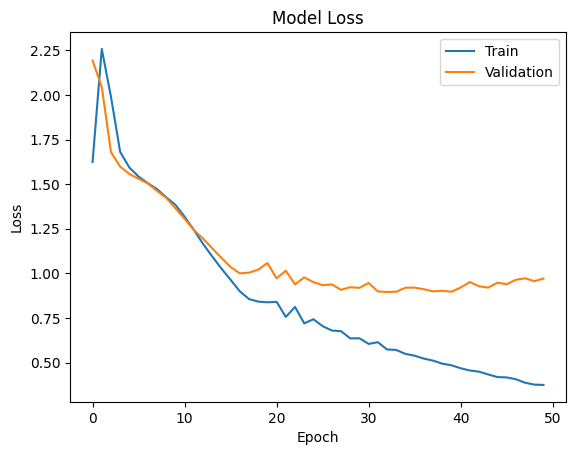

In [26]:
# modify the model architecture to cmnn
cnn_model = Sequential([
    Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])
# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))
# Plot the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [27]:
cnn_model.evaluate(x_test,y_test)

7/7 [==============================] - 1s 105ms/step - loss: 0.9710 - accuracy: 0.8000


[0.9710418581962585, 0.800000011920929]

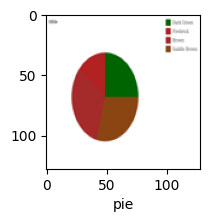

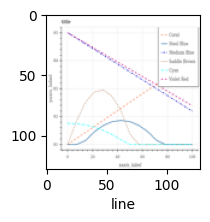

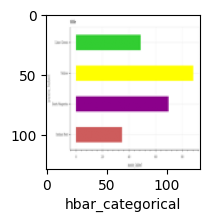

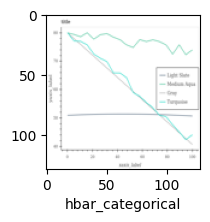

In [28]:
image_sample(x_test,y_test,1)
image_sample(x_test,y_test,50)
image_sample(x_test,y_test,25)
image_sample(x_test,y_test,30)

In [29]:
# Observation: we can see some wrong predictions

In [30]:
y_pred = cnn_model.predict(x_test)
y_pred[:5]

7/7 [==============================] - 1s 110ms/step


array([[7.3380780e-04, 2.1353099e-03, 2.9744396e-03, 2.1461055e-04,
        9.9394184e-01],
       [3.4050448e-03, 8.3379745e-01, 6.6203607e-04, 2.5225105e-03,
        1.5961294e-01],
       [3.3283431e-02, 1.1687969e-02, 6.1335581e-05, 3.7337042e-05,
        9.5493001e-01],
       [8.7275639e-02, 5.6018166e-02, 6.6639823e-03, 5.9374194e-03,
        8.4410483e-01],
       [4.7114212e-03, 3.5774865e-04, 9.8854047e-01, 1.8287145e-03,
        4.5617279e-03]], dtype=float32)

In [31]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[4, 1, 4, 4, 2]

In [32]:
y_test[:5]

array([0, 4, 4, 4, 0])

In [33]:
# here we see some values are not matching

'dot_line'

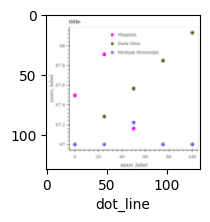

In [34]:
# test actual and predicted
# image_sample(x_test,y_test,1) #actual
# image_classes[y_classes[1]] #predicted
# image_sample(x_test,y_test,10) #actual
# image_classes[y_classes[10]] #predicted
image_sample(x_test,y_test,15) #actual
image_classes[y_classes[15]] #predicted

In [35]:
# some values are not matching

In [36]:
print("classification report: \n", classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.76      0.70      0.73        37
           1       0.73      0.84      0.78        44
           2       0.95      0.79      0.86        48
           3       0.86      0.97      0.91        33
           4       0.71      0.71      0.71        38

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



In [37]:
# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_classes)
print('Confusion Matrix:')
print(conf_mat)

Confusion Matrix:
[[26  5  1  0  5]
 [ 1 37  0  0  6]
 [ 5  0 38  5  0]
 [ 0  0  1 32  0]
 [ 2  9  0  0 27]]


Text(95.72222222222221, 0.5, 'Actual')

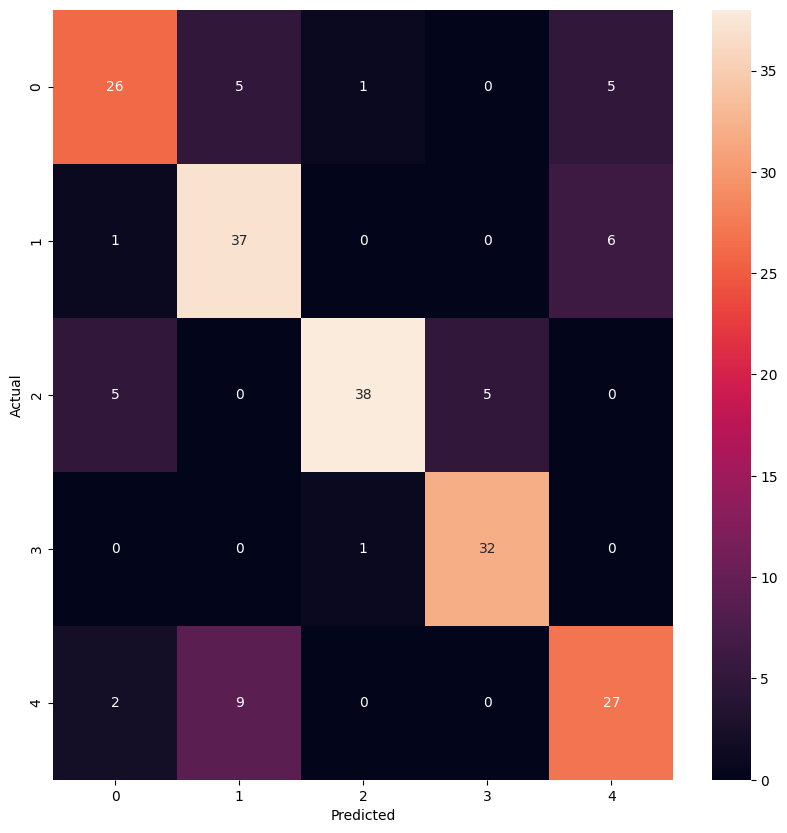

In [38]:
# Plot the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [39]:
# for 50 iterations, we can see some promising accuracy, more training will be required for better accuracy
# in the confusion matrix, whatever is not in diagonal is a error

In [40]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Load the pre-trained model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [41]:
# Replace the final classification layer with a new layer
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg16_model.input, outputs=predictions)

In [42]:
# Freeze the weights of all layers except the new classification layer
for layer in pt_model.layers:
    layer.trainable = False

IndentationError: ignored

In [ ]:
# Compile the model with categorical crossentropy loss and Adam optimizer
pt_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Print the summary of the model architecture
pt_model.summary()

In [ ]:
# Set up data generators for image augmentation and feeding data to the model
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# flow method generates batches of augmented data
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
test_generator = train_datagen.flow(x_test, y_test, batch_size=32)

In [ ]:
# Train the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
history = pt_model.fit(train_generator, epochs=100, validation_data=test_generator, callbacks=[es])